<a href="https://colab.research.google.com/github/akpmohan07/Difficulty-Predictor/blob/master/static/Notebook/Difficulty_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Derive an algorithm to find the difficulty of a question. For more [Details](https://github.com/akpmohan07/Difficulty-Predictor/blob/master/static/Readme%20Files/Campus%20Hiring%20Dev%20Role%20Tasks-1.pdf)

**Reference:**

[Solving A Simple Classification Problem with Python](https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2)


# Importing the Required Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle
from google.colab import files

# Importing the Data

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/akpmohan07/Difficulty-Predictor/master/static/Data/Train_Data.csv")
data.head()


,Question_Difficulty,Question_Type,Attended,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong
0,Easy,Program,12740685,12.0,3,2,7999965,2864185,1876535
1,Medium,Match,13333275,7.3,8,5,5728370,2666655,4938250
2,Easy,FillUp,12049330,3.9,4,2,8493790,2567890,987650
3,Hard,MCQ,8395025,5.0,11,7,493825,987650,6913550
4,Easy,FillUp,11654270,3.0,3,2,6913550,3753070,987650


# Feature Analysis

In [0]:
print(data.shape) # 9 Features and 494 Rows

(494, 9)


In [0]:
print(data.describe())
print(data.describe(include=object))

           Attended  Time_Taken  ...       Partial         Wrong
count  4.940000e+02  494.000000  ...  4.940000e+02  4.940000e+02
mean   1.166727e+07   11.072065  ...  2.271595e+06  4.771109e+06
std    1.225887e+06   12.286523  ...  6.180531e+05  2.479928e+06
min    8.395025e+06    1.000000  ...  9.876500e+05  9.876500e+05
25%    1.076538e+07    3.900000  ...  1.777770e+06  2.074065e+06
50%    1.175304e+07    6.100000  ...  2.271595e+06  4.839485e+06
75%    1.254316e+07   11.775000  ...  2.765420e+06  7.209845e+06
max    1.511104e+07   60.000000  ...  3.950600e+06  8.888850e+06

[8 rows x 7 columns]
       Question_Difficulty Question_Type
count                  494           494
unique                   3             4
top                   Easy           MCQ
freq                   167           125


In [0]:
#Droping the Attended Feature as it does not affect the Difficulty
data = data.drop('Attended',axis=1)
data

,Question_Difficulty,Question_Type,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong
0,Easy,Program,12.0,3,2,7999965,2864185,1876535
1,Medium,Match,7.3,8,5,5728370,2666655,4938250
2,Easy,FillUp,3.9,4,2,8493790,2567890,987650
3,Hard,MCQ,5.0,11,7,493825,987650,6913550
4,Easy,FillUp,3.0,3,2,6913550,3753070,987650
...,...,...,...,...,...,...,...,...
489,Hard,MCQ,4.5,11,7,1086415,1580240,6913550
490,Easy,Program,14.0,2,1,7901200,2962950,1876535
491,Easy,Match,3.5,3,0,7407375,2962950,2666655
492,Hard,Match,11.4,11,9,987650,1679005,7407375


#Pre-Processing the Data

 ***Handling Categorical Data***

  1.Handling Question_Type ***Category by Creating Dummy Variable***






In [0]:
#Handling Question_Type Category by Creating Dummy Variable
dummy = pd.get_dummies(data.Question_Type)
data = pd.concat([data,dummy],axis='columns')
data = data.drop('Question_Type',axis = 'columns')
data

,Question_Difficulty,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong,FillUp,MCQ,Match,Program
0,Easy,12.0,3,2,7999965,2864185,1876535,0,0,0,1
1,Medium,7.3,8,5,5728370,2666655,4938250,0,0,1,0
2,Easy,3.9,4,2,8493790,2567890,987650,1,0,0,0
3,Hard,5.0,11,7,493825,987650,6913550,0,1,0,0
4,Easy,3.0,3,2,6913550,3753070,987650,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
489,Hard,4.5,11,7,1086415,1580240,6913550,0,1,0,0
490,Easy,14.0,2,1,7901200,2962950,1876535,0,0,0,1
491,Easy,3.5,3,0,7407375,2962950,2666655,0,0,1,0
492,Hard,11.4,11,9,987650,1679005,7407375,0,0,1,0


2.Handling Question_Difficulty Category by ***Label Encoding***

In [0]:
#Handling Question_Difficulty Category by Label Encoding
le = LabelEncoder()
data.Question_Difficulty = le.fit_transform(data.Question_Difficulty)
data.head()

,Question_Difficulty,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong,FillUp,MCQ,Match,Program
0,0,12.0,3,2,7999965,2864185,1876535,0,0,0,1
1,2,7.3,8,5,5728370,2666655,4938250,0,0,1,0
2,0,3.9,4,2,8493790,2567890,987650,1,0,0,0
3,1,5.0,11,7,493825,987650,6913550,0,1,0,0
4,0,3.0,3,2,6913550,3753070,987650,1,0,0,0


# Train and Test Data Split

1.Splitting the **Feature and Target Data**

In [0]:
#Splitting the Feature and Target Data
x = data.drop('Question_Difficulty',axis = 1)
y = data['Question_Difficulty']

2.Spliting ***Train and Test Data***

In [0]:
#Spliting Train and Test Data
train,test,train_label,test_label = train_test_split(x,y,random_state = 0,test_size=0.5)
print(train.shape,test.shape)

(247, 10) (247, 10)


# Building Model

Logistic Regression

In [0]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train)
x_test = scaler.transform(test)
logreg = LogisticRegression()
logreg.fit(x_train,train_label)
logreg.score(x_test,test_label)

1.0

DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(train,train_label)
print(dtc.score(test,test_label))
pickle.dump(dtc, open('model.pkl', 'wb'))
#files.download('model.pkl')

1.0


LinearDiscriminantAnalysis


In [0]:
lda = LinearDiscriminantAnalysis()
lda.fit(train, train_label)
lda.score(test,test_label)

1.0

KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier()
knn.fit(train, train_label)
knn.score(test,test_label)

1.0

Gaussian Naive Bayes

In [0]:
gnb = GaussianNB()
gnb.fit(train,train_label)
gnb.score(test,test_label)

1.0

Support Vector Machine

In [0]:
svm = SVC()
svm.fit(train, train_label)
svm.score(test,test_label)

1.0

# Visualizing The Model


**Reference:**

[Visualize Scikit-learn models’ decision boundaries](https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508)

In [0]:

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    #print(reduced_data)
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    #print(y_min, y_max,x_min, x_max)
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #print(xx,yy)
    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
   
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Plotting
    plt.contourf(xx, yy,Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Time-Taken",fontsize=15)
    plt.ylabel("Submission",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

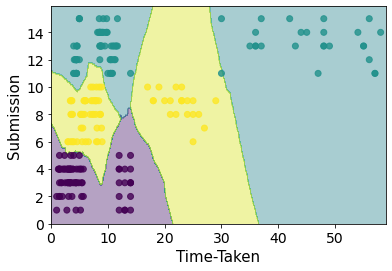

In [0]:
plot_decision_boundaries(test,test_label,KNeighborsClassifier)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

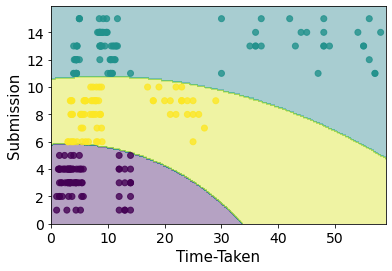

In [0]:
plot_decision_boundaries(test,test_label,GaussianNB)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

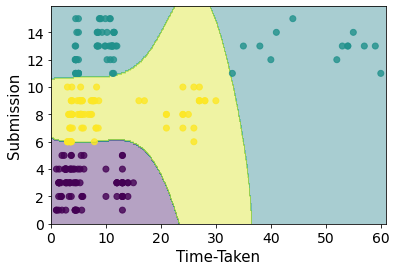

In [0]:
plot_decision_boundaries(train,train_label,SVC)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

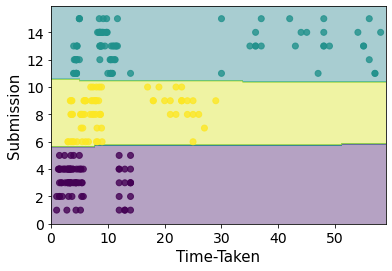

In [0]:
plot_decision_boundaries(test,test_label,LinearDiscriminantAnalysis)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

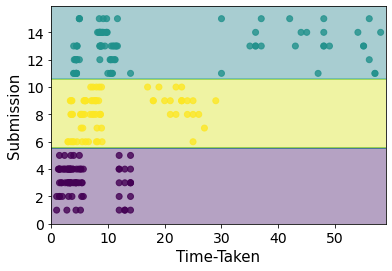

In [0]:
plot_decision_boundaries(test,test_label,DecisionTreeClassifier)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

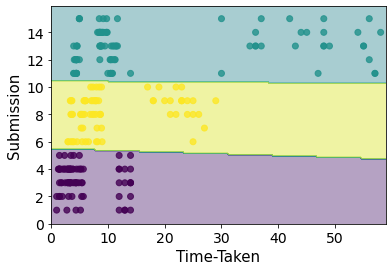

In [0]:
plot_decision_boundaries(test,test_label,LogisticRegression)